## Einstein Toolkit

In [2]:
import CactusTool

name = 'BBH006Lev1'
sim = CactusTool.load(name, '/Volumes/simulations/BBH_Catalog')
mp = sim.ThornOutput('multipole')
bbh = sim.ThornOutput('TwoPunctures')
strain = mp.Strain(bbh.ADMMass, bbh.CutoffFrequency, (2,2), -1)

## NRSur7dq4

In [3]:
import warnings
warnings.filterwarnings('ignore')

import gwsurrogate
import numpy as np

sur = gwsurrogate.LoadSurrogate('NRSur7dq4')
m1 = bbh.m1
m2 = bbh.m2
q = bbh.mass_ratio
chiA = bbh.chi1
chiB = bbh.chi2
dt = 0.1        # timestep size, Units of M
f_low = bbh.Omega_orb / np.pi   # initial frequency, f_low=0 returns the full surrogate
t, h, dyn = sur(q, chiA, chiB, dt=dt, f_low=f_low) 

setting __package__ to gwsurrogate.new so relative imports work
__name__ = gwsurrogate.new.spline_evaluation
__package__= gwsurrogate.new
setting __package__ to gwsurrogate.new so relative imports work
setting __package__ to gwsurrogate.new so relative imports work
Loaded NRSur7dq4 model


## Gravitational Wave

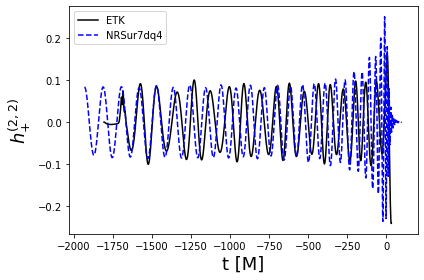

In [7]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(strain.t-1700, strain.y.real, 'k', label='ETK')
plt.plot(t, h[(2,2)].real, 'b--', label='NRSur7dq4')
plt.ylabel('$h_{+}^{(2,2)}$', fontsize=18)
plt.xlabel('t [M]', fontsize=18)
# plt.xlim(-100,100)
plt.legend()
plt.tight_layout()
plt.show()
# plt.savefig('/Users/liuyu/Downloads/GW_BBH002.png')